
# **ESERCITAZIONE DI IDROLOGIA**

DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA\
CORSO DI LAUREA IN INGEGNERIA PER L'AMBIENTE E IL TERRITORIO\
ANNO ACCADEMICO 2022-2023
    
Studentesse:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Noemi Bando [201662]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Anna Curti [ 211369]&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Elisabetta Sabbatini [209210]

---
## INDICE:
1. Presentazione dei dati
2. Curve di Gumbel 
   -  Metodo dei Momenti 
   -  Metodo della Massima Verosimiglianza
   -  Metodo dei  Minimi Quadrati
3. Test di Pearson
4. Stima della LSPP
-----

# 1. Presentazione dei dati

Vengono illustrati e successivamente analizzati i dati relativi alle precipitazioni presso la stazione
meteorologica di **Passo Rolle**, ottenuti basandosi sulle serie storiche a partire dall'anno 1980 fino all'anno 2021. Ci sono 8 anni senza dati registrati: 1984, 1988, 1989, 1990, 1991, 2009, 2014.

Codice Stazione:  T0103 \
Latitudine: 46°17'52.5'' N\
Longitudine: 11°47'13.6'' E\
Altitudine: 1995 m s.l.m. \
Data inizio raccolta dati: 01-01-1980 


In [35]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.express as px

os.getcwd()
os.chdir('/Users/elisa/OneDrive/Desktop/IDROLOGIA 23/Esercit1') #/Users/elisa/OneDrive/Desktop/IDROLOGIA 23/Esercit1") #/Users/bando/Desktop/PROGETTOIDROLOGIA
data = pd.read_csv('pluviometriaPasso.txt')
data = data.dropna()    
map(datetime, data['Anno'])
data = data.set_index(['Anno'])
data.head()

,1h,3h,6h,12h,24h
Anno,,,,,
1980,13.8,19.8,23.8,27.4,46.8
1981,13.8,27.4,43.4,53.8,91.4
1982,26.8,34.8,39.8,42.8,49.2
1983,14.6,19.6,27.2,48.2,95.0
1985,16.8,29.8,52.2,79.4,87.6


In [36]:
# dato che il programma legge i dati delle 6 ore come stringhe, si converte quella parte di dati in float
data6h = data['6h']
new6h = []
for i in data6h.index:
    new = float(data6h[i])
    new6h.append(new)
    
# si tolgono i dati delle 6h difettosi
data = data.drop(['6h'],axis = 1)

# si aggiungono al dataframe i dati delle 6h convertiti in float 
data_c = data.insert(2, '6h', new6h, allow_duplicates = False)

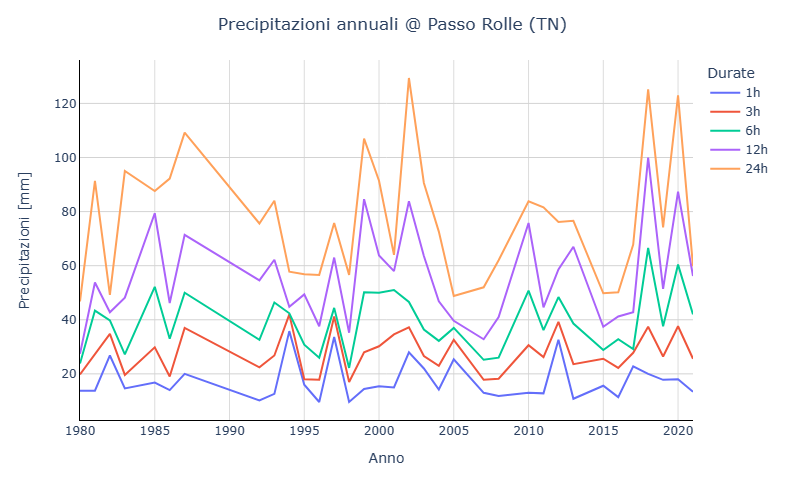

In [37]:
ax = px.line(data, height = 500)

ax.update_layout(title = 'Precipitazioni annuali @ Passo Rolle (TN)',
                  title_x = 0.5,
                  plot_bgcolor = 'white',
                  yaxis_title = 'Precipitazioni [mm]',
                  xaxis_title = 'Anno',
                  legend_title = 'Durate')

ax.update_xaxes(gridcolor = 'gainsboro', linecolor = 'black')
ax.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black')

ax

# 2. Curve di Gumbel

Per ottenere le curve di possibilità pluviometrica del sito in questione si devono valutare, per ogni durata di precipitazione disponibile a partire dalle serie storiche, delle coppie durata-pioggia cumulata: si considera il campione come estratto da una variabile continua h(t) e si associa ad ogni valore della variabile continua una funzione detta distribuzione di probabilità P(h). 
Si ha però il problema di scegliere la **forma della distribuzione di probabilità** che deve rappresentare con ragionevole approssimazione la distribuzione vera, ma incognita, della variabile h(t).
A questo scopo si introducono le **curve di Gumbel**, che sono descritte da un parametro di forma (b) e un parametro di posizione o moda (a), e che vengono espresse nella forma:


   $$P[H<h; a,b] = e^{-e-{\frac{h-a}{b}}}$$  $con -∞<h<+∞$


Le curve di Gumbel sono dunque delle curve di probabilità che andranno interpolate ai dati empirici ottenuti dalle serie storiche della stazione meteorologica di Passo Rolle.
Per determinarne i parametri si utilizzano i metodi di adattamento degli stessi, i quali sono:
- metodo dei momenti
- metodo dei minimi quadrati
- metodo della massima verosimiglianza


# > Gumbel - Metodo dei momenti


Il metodo dei momenti consente di determinare i parametri della curva di Gumbel eguagliando i **momenti del campione** con i **momenti della popolazione**: questo metodo afferma che al fine di determinare una stima dei parametri, basta risolvere un numero di equazioni pari al numero dei parametri da stimare.
Il metodo risulta efficiente quando l’integrale a secondo membro ammette una soluzione analitica. 

Nell’esempio di applicazione del metodo dei momenti alla curva di Gumbel si ha quindi:

$$\begin{equation}
\left\{
\begin{array}{l}
b \gamma + a = \mu_H \\
\sigma^2_H = b^2  \frac{\pi^2}{6}
\end{array}
\right.
\end{equation}$$
dove $a$ e $b$ sono i parametri da stimare, $\mu_H$ è la media del campione di dati, $\sigma_H$ è la deviazione standard dei medesimi dati e $\gamma = 0.572$ è il numero irrazionale detto di Eulero-Mascheroni.

Dal quale si ricavano i parametri:
$$\begin{equation}
b = \frac{\sqrt{6}}{\pi} \sigma_H
\end{equation}$$

$$\begin{equation}
a = \mu_H -\frac{\sqrt{6}\gamma}{\pi} \sigma_H 
\end{equation}$$

In [4]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.express as px

data = data.dropna()
data.head()

,1h,3h,6h,12h,24h
Anno,,,,,
1980,13.8,19.8,23.8,27.4,46.8
1981,13.8,27.4,43.4,53.8,91.4
1982,26.8,34.8,39.8,42.8,49.2
1983,14.6,19.6,27.2,48.2,95.0
1985,16.8,29.8,52.2,79.4,87.6


Si calcolano ora la **media** e la **varianza** del campione.\
Si osserva, come ovvio, che la media delle altezze di precipitazione per le serie storiche aumenta con l'aumentare delle durate di precipitazione; inoltre, la dispersione per gli eventi di durate maggiori ha andamento esponenziale.

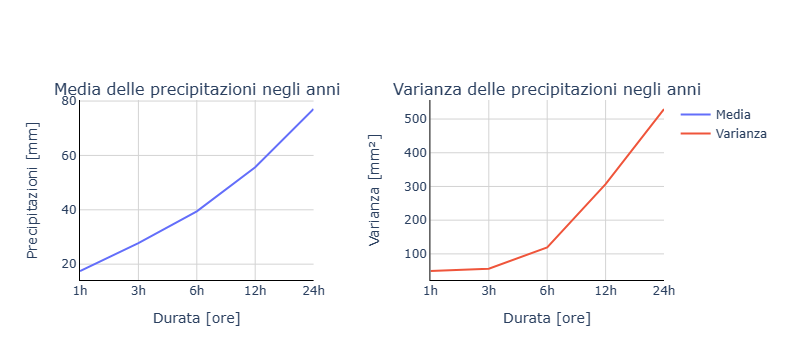

In [5]:
media = data.mean()
media

varianza = data.var()
varianza

# creazione dei grafici uno accanto all'altro tramite formazione di due subplot
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows = 1, cols = 2,
                       subplot_titles = ('Media delle precipitazioni negli anni', 'Varianza delle precipitazioni negli anni'),
                       horizontal_spacing = 0.2)

fig.add_trace(go.Scatter(x = media.index, y = media.values, mode = 'lines', name = 'Media'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = varianza.index, y = varianza.values, mode = 'lines', name = 'Varianza'), row = 1, col = 2)

fig.update_layout(height = 350, width = 800, plot_bgcolor = 'white')

fig.update_xaxes(gridcolor = 'lightgrey', linecolor = 'black', title_text = 'Durata [ore]')
fig.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black', title_text = 'Precipitazioni [mm]', row = 1, col = 1)
fig.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black', title_text = 'Varianza [mm²]', row = 1, col = 2)

fig.show()

Il metodo dei momenti si riduce alla risoluzione di:
\begin{equation}
\left\{
\begin{array}{l}
b \gamma + a = \mu_H \\
\sigma^2_H = b^2  \frac{\pi^2}{6}
\end{array}
\right.
\end{equation}
dove $a$ e $b$ sono i parametri da stimare $\mu_H$ è la media del campioni di dati e $\sigma_H$ è la deviazione standard dei medesimi dati. 
Dalla seconda equazione si ricava:
\begin{equation}
b = \frac{\sqrt{6}}{\pi} \sigma_H
\end{equation}
che, sostituito nella prima equazione, dà:
\begin{equation}
a = \mu_H -\frac{\sqrt{6}\gamma}{\pi} \sigma_H 
\end{equation}

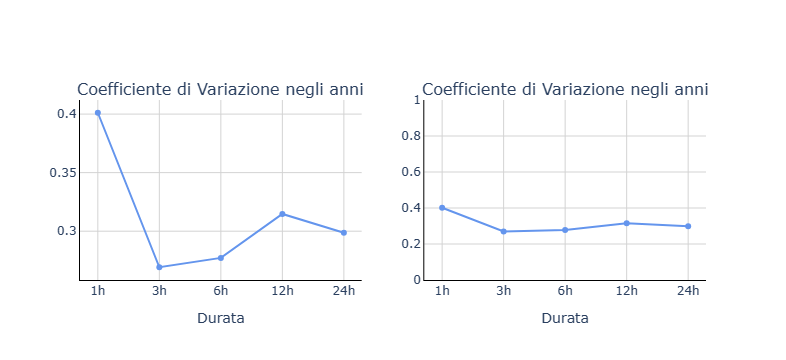

In [6]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
import numpy as np

devs = data.std()
cvar = data.std() / media

df_cvar = pd.DataFrame({'cvar': cvar})

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ('Coefficiente di Variazione negli anni',
                                                             'Coefficiente di Variazione negli anni'))
fig.add_trace(go.Scatter(x = cvar.index, y = cvar, line_color = 'cornflowerblue', showlegend = False, name=''), row = 1, col = 1)
fig.add_trace(go.Scatter(x = cvar.index, y = cvar, line_color = 'cornflowerblue', showlegend = False, name=''), row = 1, col = 2)
fig.update_layout(xaxis_title = 'Durata', plot_bgcolor = 'white', height = 350, width = 750)
fig.update_xaxes(gridcolor = 'lightgrey', linecolor = 'black', title_text = 'Durata')
fig.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black')
fig.update_yaxes(row = 1, col = 2, range = [0, 1]) #si cambia la scala dell'asse y nel secondo grafico

fig.show()

In [7]:
#definizione dei coefficienti per la determinazione dei parametri a,b
coefb = math.sqrt(6) / math.pi
EulerGamma = 0.577215664901532860606512090
coefa = coefb*EulerGamma

In [8]:
#calcolo finale di a, b con metodo dei momenti
def g(m,d):
    return pd.DataFrame([m - coefa * d, coefb * d], index = ['a','b'])
ab_mom = g(media, devs)
ab_mom

,1h,3h,6h,12h,24h
a,14.330959,24.375015,34.500058,47.774935,66.717482
b,5.469839,5.821532,8.519500,13.658480,17.946479


Abbiamo ricavato la stima dei parametri **a** e **b** per ogni durata di precipitazione

In [9]:
#definizione funzione di gumbel con i parametri a,b trovati con metodo dei momenti
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

def gumbel(x, ab_mom, col):
    return np.exp(- np.exp( - (x - ab_mom[col]['a']) / ab_mom[col]['b']))

In [10]:
t_rain = np.linspace(data.min()['1h'], data.max()['24h'], 100) #vettore con n elementi equamente distribuiti tra i due estremi

gb_mom = pd.DataFrame([gumbel(t_rain, ab_mom,'1h'),
                 gumbel(t_rain,ab_mom,'3h'),
                 gumbel(t_rain,ab_mom,'6h'),
                 gumbel(t_rain,ab_mom,'12h'),
                 gumbel(t_rain,ab_mom,'24h')]).T
gb_mom.index = t_rain
gb_mom.columns = ['1h','3h','6h','12h','24h']
gb_mom.head()

,1h,3h,6h,12h,24h
9.600000,0.093032,0.000003,8.428315e-09,7.835554e-08,3.379451e-11
10.810101,0.149048,0.000034,9.882664e-08,3.137264e-07,1.627874e-10
12.020202,0.217468,0.000236,8.364513e-07,1.116736e-06,7.077416e-10
13.230303,0.294376,0.001133,5.335631e-06,3.569434e-06,2.795833e-09
14.440404,0.375240,0.004047,2.663009e-05,1.033859e-05,1.009820e-08


Noti i coefficienti a e b è infine possibile interpolare i dati alla distribuzione in modo che, fissato un tempo di ritorno, si ricavi l'altezza di precipitazione corrispondente ad ogni durata analizzata.

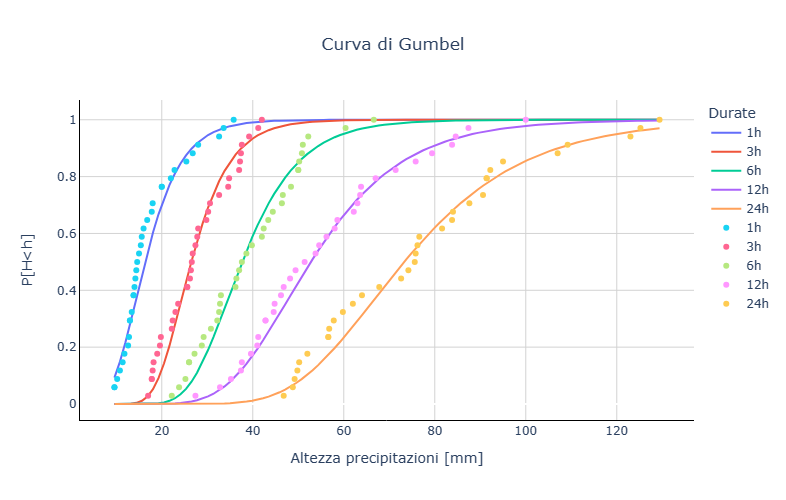

In [11]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.distributions.empirical_distribution import ECDF

gb = gb_mom

def create_gumbel_plot(data):
    fig = go.Figure()

    for column in gb.columns:
        fig.add_trace(go.Scatter(x = gb.index, y = gb[column], mode = 'lines', name = column))

    #Calcolo dei valori ECDF per ogni dataset
    ecdf1h = ECDF(data['1h'])
    ecdf3h = ECDF(data['3h'])
    ecdf6h = ECDF(data['6h'])
    ecdf12h = ECDF(data['12h'])
    ecdf24h = ECDF(data['24h'])

    fig.add_trace(go.Scatter(x = data['1h'], y = ecdf1h(data['1h']), mode = 'markers', name = '1h'))
    fig.add_trace(go.Scatter(x = data['3h'], y = ecdf3h(data['3h']), mode = 'markers', name = '3h'))
    fig.add_trace(go.Scatter(x = data['6h'], y = ecdf6h(data['6h']), mode = 'markers', name = '6h'))
    fig.add_trace(go.Scatter(x = data['12h'], y = ecdf12h(data['12h']), mode = 'markers', name = '12h'))
    fig.add_trace(go.Scatter(x = data['24h'], y = ecdf24h(data['24h']), mode = 'markers', name = '24h'))

    fig.update_layout(title = 'Curva di Gumbel', title_x = 0.5, plot_bgcolor = 'white', yaxis_title = 'P[H<h]',
                    xaxis_title = 'Altezza precipitazioni [mm]', xaxis = dict(gridcolor = 'lightgrey', linecolor = 'black'),
                    yaxis = dict(gridcolor = 'lightgrey', linecolor = 'black'), height = 500, legend_title = 'Durate')
    fig.show()

create_gumbel_plot(data)

# > Gumbel - Metodo della massima verosimiglianza


Il metodo della massima verosimiglianza calcola i valori dei parametri a e b per cui  la **probabilità congiunta** di ottenere una **serie di dati** $\{h_1, \cdot \cdot, h_n \}$ è massima:
\begin{equation}
{\rm argmax}_{a,b} P[\{h_1, \cdot \cdot, h_n \};a,b] = {\rm argmax}_{a,b} \prod_i^n P[h_i;a,b]
\end{equation}
dove la probabilità congiunta rappresenta il prodotto delle probabilità dei singoli esperimenti.

Tale funzione è detta di verosimiglianza e da questa, facendo uso del teorema di Bayes, è possibile individuare quali sono i parametri più affidabili, che sono quelli che massimizzano la probabilità di ottenere i dati osservati, ovvero sono quelli corrispondenti ai **massimi** (cioè alla moda) della **distribuzione**.

In [12]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace

import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt

data = data.dropna()
data.head()

,1h,3h,6h,12h,24h
Anno,,,,,
1980,13.8,19.8,23.8,27.4,46.8
1981,13.8,27.4,43.4,53.8,91.4
1982,26.8,34.8,39.8,42.8,49.2
1983,14.6,19.6,27.2,48.2,95.0
1985,16.8,29.8,52.2,79.4,87.6


In [13]:
# Distribution fitting, interpola i dati con metodo della verosimiglianza per ogni durata
samp = data['1h']
param1h = gumbel_r.fit(samp)
samp = data['3h']
param3h = gumbel_r.fit(samp)
samp = data['6h']
param6h = gumbel_r.fit(samp)
samp = data['12h']
param12h = gumbel_r.fit(samp)
samp = data['24h']
param24h = gumbel_r.fit(samp)

In [14]:
# Creare il dataframe in forma matriciale
ab_mv = pd.DataFrame([param1h, param3h, param6h, param12h, param24h],
                     columns = ['a','b'],
                     index = ['1h','3h','6h','12h','24h']).T
ab_mv.to_pickle('ab_mv')
ab_mv 

,1h,3h,6h,12h,24h
a,14.517321,24.182012,34.249009,47.653751,66.515773
b,4.600175,6.223984,9.132205,13.709537,17.872251


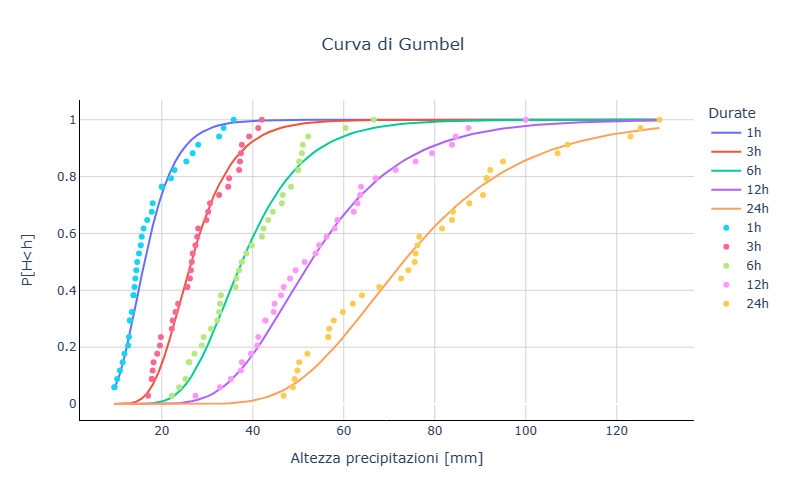

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

gb_mv = pd.DataFrame([gumbel(t_rain, ab_mv, '1h'),
                 gumbel(t_rain, ab_mv, '3h'),
                 gumbel(t_rain, ab_mv, '6h'),
                 gumbel(t_rain, ab_mv, '12h'),
                 gumbel(t_rain, ab_mv, '24h')]).T
gb_mv.index = t_rain
gb_mv.columns = ['1h', '3h', '6h', '12h', '24h']

gb = gb_mv
create_gumbel_plot(data)

# - Gumbel - Metodo dei minimi quadrati


Questo metodo consiste quindi nel ricavare i parametri della distribuzione considerando quelli tali da rendere **minimo lo scarto quadratico** tra funzione di distribuzione empirica e funzione di distribuzione.
Lo scarto minimo si trova tramite la seguente espressione:
\begin{equation} 
\delta^2(a,b) = \sum_i^N (ECDF_i-P[h_i;a,b])^2 \to \rm min 
\end{equation}

Dove la funzione di probabilità è approssimata ad una gaussiana, per cui vale:
\begin{equation}
\ P[h_i;a,b]    {->}   e^{-e^\frac{-x-a_i}{b}}
\end{equation}

In [16]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot, show, hist, figure, title

import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF   
from scipy.optimize import least_squares
import plotly.graph_objs as go
import plotly.express as px

data = data.dropna()
data.head()

,1h,3h,6h,12h,24h
Anno,,,,,
1980,13.8,19.8,23.8,27.4,46.8
1981,13.8,27.4,43.4,53.8,91.4
1982,26.8,34.8,39.8,42.8,49.2
1983,14.6,19.6,27.2,48.2,95.0
1985,16.8,29.8,52.2,79.4,87.6


In [17]:
x0 = ab_mv #volendo si possono scegliere anche i parametri abs_mom (sono valori arbitrari)
ore = ['1h', '3h', '6h', '12h', '24h']

In [18]:
def fun(x, t, y):
    return np.exp(-np.exp(- (t - x[0]) / x[1])) - y

def t_train(data, i):
    return sorted(data[i].dropna())

def y_train(data, i):
    ecdf = ECDF(data[i])
    t_train = sorted(data[i].dropna())
    return ecdf(t_train)

num = []
for i in range(len(ore)):
    res_lsq = least_squares(fun, x0.iloc[:,i], args = (t_train(data, ore[i]), y_train(data, ore[i])))
    num.append(res_lsq.x)
ab_mq = pd.DataFrame(num, columns = ['a','b'], index = ore).T
ab_mq

,1h,3h,6h,12h,24h
a,13.688720,23.789014,33.77347,46.464907,64.826340
b,4.258686,7.072663,10.20460,14.502277,20.284488


In [19]:
ab_mq.to_pickle('ab_mq') 

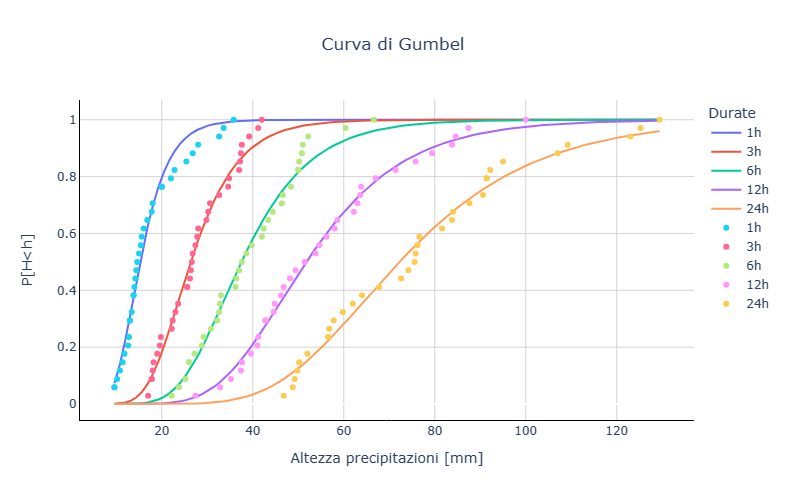

In [20]:
gb_mq = pd.DataFrame([gumbel(t_rain, ab_mq, '1h'),
                 gumbel(t_rain, ab_mq, '3h'),
                 gumbel(t_rain, ab_mq, '6h'),
                 gumbel(t_rain, ab_mq, '12h'),
                 gumbel(t_rain, ab_mq, '24h')]).T
gb_mq.index = t_rain
gb_mq.columns = ['1h', '3h', '6h', '12h', '24h']

gb = gb_mq
create_gumbel_plot(data)

# 3. Test di Pearson

Il test di Pearson è un criterio di confronto che sfrutta la distribuzione del chi quadro e che viene utilizzato per distinguere quale delle coppie (a, b) ottenute con i tre metodi di adattamento sia la migliore: in particolare, consiste nel suddividere il campo di probabilità in k parti, derivarne una suddivisione del dominio, contare il numero di dati in ciascun intervallo e valutare la funzione del chi quadro:
\begin{equation}
\chi^2=\sum_{j=1}^k \dfrac{(N_j-n(P[H<h_{j+1}]-P[H<h_j])^2)}{n(P[H<h_{j+1}]-P[H<h_j])}
\end{equation}
scegliendo la coppia in cui $\chi^2$ è più piccolo, ovvero in cui il quadrato degli scarti tra frequenze osservate e teoriche è minore.

In [21]:
# definizione chi2
def X2(data, abs_t, h, delta):
    dt = data[h].dropna()
    lh = len(dt)
    q = [delta * (i + 1) for i in range(int(1 / delta))]
    rv = gumbel_r(loc = abs_t.at['a', h], scale = abs_t.at['b', h])
    ecdf = ECDF(dt)
    r = ecdf(rv.ppf(q))
    o0 = lh * r
    o = o0 - np.append([0], np.delete(o0, -1)) 
    e = [delta * lh for i in range(len(r))]
    return ((o - e)**2 / e).sum()

In [22]:
# applicazione della funzione sui parametri dei 3 metodi di Gumbel
a = []
for h in data.columns:
    a = a + [[X2(data, ab_mom, h, 0.2), X2(data, ab_mv, h, 0.2), X2(data, ab_mq, h, 0.2)]]
   
tab_X2 = pd.DataFrame(a, ore, columns = ['Mom','MV','MQ'])
tab_X2

,Mom,MV,MQ
1h,6.588235,4.529412,1.882353
3h,3.941176,3.941176,3.941176
6h,1.588235,1.588235,0.411765
12h,0.705882,0.705882,1.294118
24h,3.058824,3.058824,1.294118


In [23]:
#Determino lo scarto quadrato minimo tra i tre ottenuti per ogni durata
min_X2 = tab_X2.min(axis = 1)

best = []
for i in range(len(tab_X2.index)):
    min_X2 = tab_X2.min(axis = 1)[i]
    
    if min_X2 == tab_X2['Mom'][i]:
        best.append(ab_mom.iloc[:,i])
        
    elif min_X2 == tab_X2['MV'][i]:
        best.append(ab_mv.iloc[:,i])
    
    else:
        best.append(ab_mq.iloc[:,i])

best_par = pd.DataFrame(best, columns = ['a', 'b'], index = ore).T
best_par

,1h,3h,6h,12h,24h
a,13.688720,24.375015,33.77347,47.774935,64.826340
b,4.258686,5.821532,10.20460,13.658480,20.284488


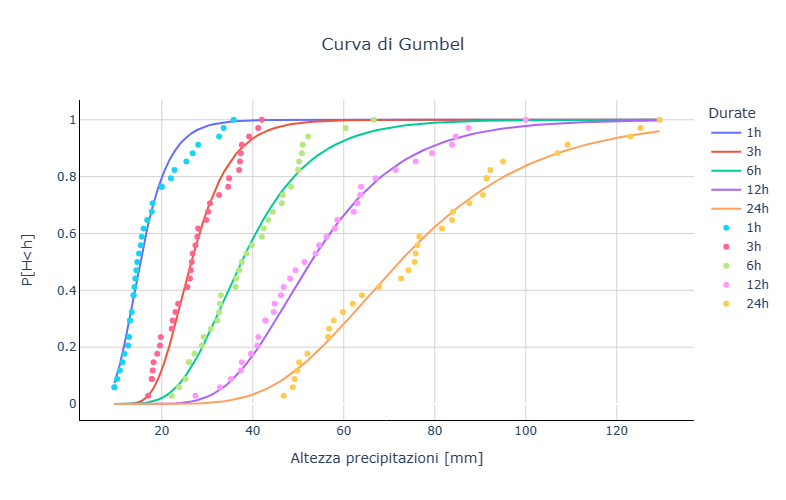

In [24]:
gb_best = pd.DataFrame([gumbel(t_rain, best_par, '1h'),
                    gumbel(t_rain, best_par, '3h'),
                    gumbel(t_rain, best_par, '6h'),
                    gumbel(t_rain, best_par, '12h'),
                    gumbel(t_rain, best_par, '24h')]).T

gb_best.index = t_rain 
gb_best.columns = data.columns

gb = gb_best
create_gumbel_plot(data)

# 4. Stima della LSPP

Le linee segnalatrici di possibilità pluviometrica (o curve di possibilità pluviometrica) sono particolari curve che, assegnato il tempo di ritorno, forniscono la relazione tra le altezze massime e le durate di pioggia che si possono verificare in una data zona.\
Ad ogni curva corrisponde quindi un valore di periodo di ritorno e, per ogni durata di precipitazione disponibile nelle serie storiche, si devono valutare le coppie durata/pioggia cumulata (la quale è funzione del tempo di ritorno).\
Vengono espresse tramite una legge di potenza:

\begin{equation}
h(t_p,T_r )=a(T_r )·t_p^n
\end{equation}

dove *tp* è la durata della precipitazione, *a* il termine noto dipendente dal tempo di ritorno ed *n* il coefficiente angolare compreso tra 0 e 1.\
Vengono utilizzate nella costruzione di opere ingegneristiche per effettuare la stima del tempo di ritorno di un determinato evento, poichè il terreno assume comportamenti diversi per durate diverse dello stesso.

In [25]:
def quantili(data, q):
    rev1h = gumbel_r(loc = data['a'], scale = data['b'])
    return rev1h.ppf(q)

In [26]:
def altezze(dati, T_r):
    lista = []        
    for i in dati.columns:
        lista.append(quantili(dati[i], 1 - 1/T_r))   #quantili = 1 - (1 / T_ritorno)
    return lista

In [27]:
tempi = [1, 3, 6, 12, 24]

In [28]:
punti = []
T_r = [10, 20, 100]
for i in range(len(T_r)):
    punti.append(altezze(best_par, T_r[i]))
h_ = pd.DataFrame(punti, index = T_r, columns = tempi).T

In [29]:
#Funzione polinomiale per calcolare pendenza e termine noto di una regressione lineare sui dati del ln delle variabili 
def elev(pts, tr):
    a = np.polyfit(np.log(pts.index), np.log(pts[tr]), 1) 
    return [a[0], np.exp(a[1])]                 
fnl = pd.DataFrame([elev(h_, 10), elev(h_, 20), elev(h_, 100)], index = [10, 20, 100], columns = ['n', 'a'])
fnl

,n,a
10,0.496285,22.794169
20,0.497411,25.618144
100,0.499250,32.007965


In [30]:
def h(tp, a, n):
    return a * tp**n

In [31]:
#Ascisse: durata considerata
tp = np.linspace(0.7, 30, 100)
#Ordinate: altezze di precipitazione
htr = []
for i in range(len(T_r)):
    htr.append(h(tp, fnl['a'][T_r[i]],fnl['n'][T_r[i]]))

In [32]:
hts = pd.DataFrame(htr, index = [10, 20, 100], columns = tp).T

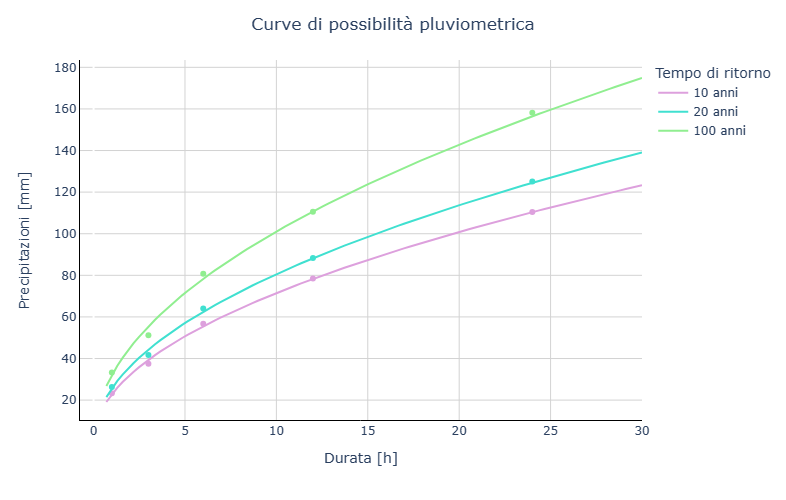

In [33]:
fig = px.line(height = 500)

paint = ['plum', 'turquoise', 'lightgreen']

fig.add_trace(go.Scatter(x = tp, y = hts[10], mode = 'lines', name = '10 anni', line = dict(color = paint[0]))) 
fig.add_trace(go.Scatter(x = h_.index, y = h_[T_r[0]], mode = 'markers', name = T_r[0], 
                         showlegend = False, marker = dict(color = paint[0])))
fig.add_trace(go.Scatter(x = tp, y = hts[20], mode = 'lines', name = '20 anni', line = dict(color = paint[1]))) 
fig.add_trace(go.Scatter(x = h_.index, y = h_[T_r[1]], mode = 'markers', name = T_r[1],
                         showlegend = False, marker = dict(color = paint[1])))
fig.add_trace(go.Scatter(x = tp, y = hts[100], mode = 'lines', name = '100 anni', line = dict(color = paint[2]))) 
fig.add_trace(go.Scatter(x = h_.index, y = h_[T_r[2]], mode = 'markers', name = T_r[2],
                         showlegend = False, marker = dict(color = paint[2])))

fig.update_layout(title ='Curve di possibilità pluviometrica', plot_bgcolor = 'white', title_x = 0.5,
                  yaxis_title = 'Precipitazioni [mm]', xaxis_title = 'Durata [h]', legend_title = 'Tempo di ritorno')
fig.update_xaxes(gridcolor = 'lightgrey', linecolor = 'black')
fig.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black')
fig.update

fig.show()

Su un piano bilogaritmico le LSPP sono delle rette tra loro parallele, ed è facile visualizzare come le altezze di precipitazione più elevate corrispondano ad elevati tempi di ritono.  

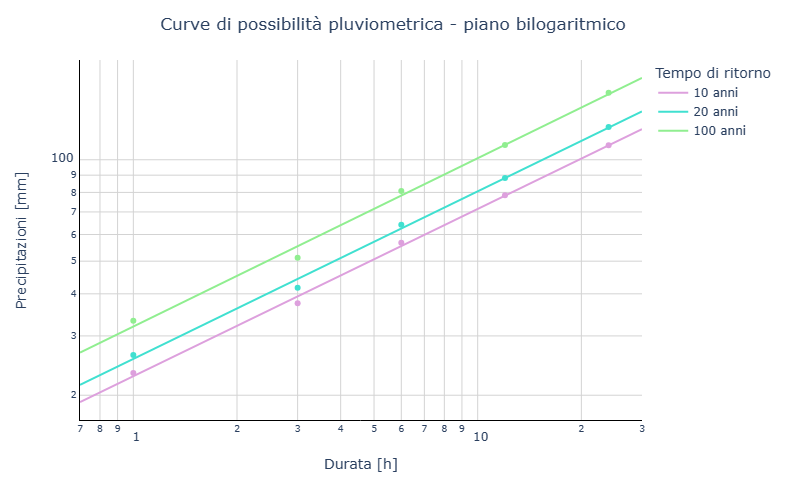

In [34]:
fig = px.line(height = 500)

paint = ['plum', 'turquoise', 'lightgreen']

fig.add_trace(go.Scatter(x = tp , y = hts[10] , mode = 'lines', name = '10 anni', line = dict(color = paint[0]))) 
fig.add_trace(go.Scatter(x = h_.index , y = h_[T_r[0]] , mode = 'markers', name = '',
                         showlegend = False, marker = dict(color = paint[0])))
fig.add_trace(go.Scatter(x = tp , y = hts[20] , mode = 'lines', name = '20 anni', line = dict(color = paint[1]))) 
fig.add_trace(go.Scatter(x = h_.index , y = h_[T_r[1]] , mode = 'markers', name = '',
                         showlegend = False, marker = dict(color = paint[1])))
fig.add_trace(go.Scatter(x = tp , y = hts[100] , mode = 'lines', name = '100 anni', line = dict(color = paint[2]))) 
fig.add_trace(go.Scatter(x = h_.index , y = h_[T_r[2]] , mode = 'markers', name = '',
                         showlegend = False, marker = dict(color = paint[2])))

fig.update_layout(title ='Curve di possibilità pluviometrica - piano bilogaritmico', title_x = 0.5, plot_bgcolor = 'white',
                  yaxis_title = 'Precipitazioni [mm]', xaxis_title = 'Durata [h]', legend_title = 'Tempo di ritorno')
fig.update_xaxes(gridcolor = 'lightgrey', linecolor = 'black', type = 'log',)
fig.update_yaxes(gridcolor = 'lightgrey', linecolor = 'black', type = 'log',)

fig.show()